Average probability Random - 0.5013722222222222
Average probability Intuition - 0.49811111111111117
Average probability Pick a door and take it to the end - 0.11709444444444445
Average probability Change doors every round - 0.6686500000000001


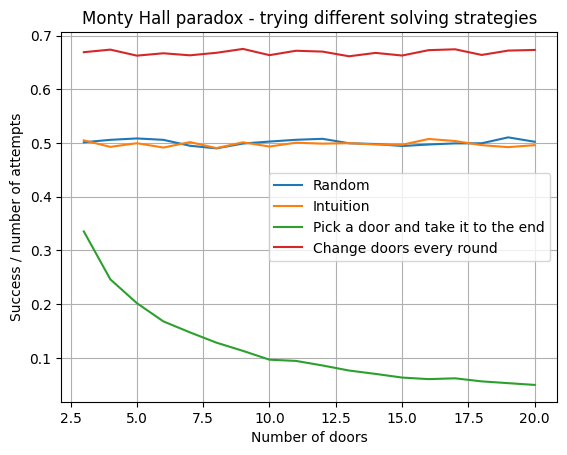

In [7]:

def probabilidade_portas(num_doors, num_tests):
    #16/02/2023
    import random as r
    favorable_random = 0
    favorable_one = 0 #choses one door, takes to the end
    favorable_intuition = 0
    favorable_changing = 0 
    str_doors = [f'goat{i}' for i in list(range(num_doors - 1))]
    str_doors.append('car')


    for i in range(num_tests):
        remaining_doors = list(range(num_doors))
        prize_door = r.choice(remaining_doors)


        #Random door chosen every round (including previous one)
        while len(remaining_doors) > 2:
    
            chosen_door = r.choice(remaining_doors)
            eliminated = r.choice([i for i in remaining_doors if i != prize_door and i!= chosen_door])
            remaining_doors.remove(eliminated)

        if r.choice(remaining_doors) == prize_door:
            favorable_random+=1
        

        #Choses one door and keeps it
        remaining_doors = list(range(num_doors))
        chosen_door = r.choice(remaining_doors)

        while len(remaining_doors) > 2:
            eliminated = r.choice([i for i in remaining_doors if i != prize_door and i!= chosen_door])
            remaining_doors.remove(eliminated)
            
        if chosen_door == prize_door:
             favorable_one +=1
        

        #INTUITION (50% chance of change)
        remaining_doors = list(range(num_doors))
        x = 0
        y = 0
        chosen_door = r.choice(remaining_doors)

        while len(remaining_doors) > 2:
    
            chosen_door = chosen_door if r.randint(x, y) == 0 else r.choice([i for i in remaining_doors if i != chosen_door])
            eliminated = r.choice([i for i in remaining_doors if i != prize_door and i!= chosen_door])
            remaining_doors.remove(eliminated)
            y = 1
        chosen_door = chosen_door if r.randint(x, y) == 0 else r.choice([i for i in remaining_doors if i != chosen_door])

        if chosen_door == prize_door:
            favorable_intuition +=1
        

        #Changes every round
        doors2 = list(i for i in str_doors)
        for i in range(num_doors):
            choose = r.choice(doors2)
            doors2.remove(r.choice([i for i in doors2 if i!= 'car' and i != choose]))


            if len(doors2) == 2:
                new_choice = r.choice([i for i in doors2 if i !=choose])
                if new_choice == 'car':
                    favorable_changing+=1
                break

    prob_random = favorable_random / num_tests
    prob_one =  favorable_one / num_tests
    prob_intuition = favorable_intuition  / num_tests
    prob_changing = favorable_changing / num_tests


    
    return prob_one, prob_random, prob_intuition, prob_changing

def plot_stats(up_to, num_tests_for_each_point, step = 1):
    #16/02/2023
    import matplotlib.pyplot as plt, pandas as pd, numpy as np
    data_dict = {'Random': [], 'Intuition': [], 'Pick a door and take it to the end': [], 'Change doors every round': [], 'index' : [i+3 for i in range(0, up_to, step) if i+3<=up_to]}
    up_to += 1
    for i in range(0, up_to, step):
        if i>2:
            x = probabilidade_portas(i, num_tests_for_each_point)
            data_dict['Pick a door and take it to the end'].append(x[0])
            data_dict['Random'].append(x[1])
            data_dict['Intuition'].append(x[2])
            data_dict['Change doors every round'].append(x[3])
    x = pd.DataFrame(data_dict).set_index(['index'])
    x.plot()
    
    plt.xlabel('Number of doors')
    plt.ylabel('Success / number of attempts')
    plt.title('Monty Hall paradox - trying different solving strategies')
    plt.grid()

    for i in [i for i in data_dict if i != 'index']:
        print('Average probability', i, '-', np.mean(data_dict[i]))
    



plot_stats(20, 10000, step = 1)

